In [1]:
!pip install tensorflow
#import tensorflow as tf
from tensorflow import keras
#yahoo finance as data source
!pip install yfinance
import yfinance as yf
import flask
from flask import Flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 794.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.

**Prediction of stock price or commodities volatility (NEXT DAY or up to 3 days) based on statistical data for the last 25 years, Model: RNN + LSTM&ReLU, TensorFlow 2.3, API: YAHOO Finance**

In [56]:
#See the yahoo finance ticker for your stock symbol
#stock_symbol = 'GAIL.NS'
#stock_symbol = '^GSPC' 
#stock_symbol = 'IBM'
#stock_symbol = 'NG=F'
stock_symbol = 'GC=F' # Gold

In [57]:
#last 5 year#s data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='20y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [58]:
type(data)

pandas.core.frame.DataFrame

In [59]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-23 00:00:00-05:00,364.500000,364.500000,364.500000,364.500000,364.500000,1
2003-01-24 00:00:00-05:00,368.200012,368.200012,367.000000,368.200012,368.200012,44
2003-01-27 00:00:00-05:00,371.000000,372.000000,369.399994,369.399994,369.399994,28
2003-01-28 00:00:00-05:00,369.000000,370.000000,369.000000,370.000000,370.000000,0
2003-01-29 00:00:00-05:00,366.299988,366.299988,366.299988,366.299988,366.299988,834


In [60]:
len(data)

5025

In [61]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-17 00:00:00-05:00,1920.099976,1920.099976,1905.199951,1907.199951,1907.199951,706
2023-01-18 00:00:00-05:00,1911.099976,1911.099976,1903.099976,1904.400024,1904.400024,1027
2023-01-19 00:00:00-05:00,1922.099976,1931.800049,1922.099976,1922.099976,1922.099976,371
2023-01-20 00:00:00-05:00,1922.099976,1928.500000,1921.400024,1926.400024,1926.400024,371
2023-01-23 00:00:00-05:00,1928.400024,1936.699951,1914.400024,1921.400024,1921.400024,112780


In [62]:
import matplotlib.pyplot as plt

In [63]:
opn = data[['Open']]

In [64]:
cln = data[['Close']]

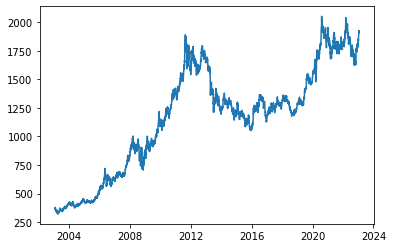

In [65]:
#plt.plot(opn)
plt.plot(cln)

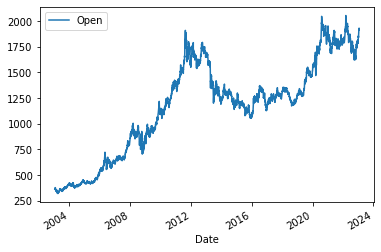

In [66]:
opn.plot()

In [67]:
#import matplotlib.pyplot as plt

In [68]:
#ds = opn.values
ds = cln.values

In [69]:
ds

array([[ 364.5       ],
       [ 368.20001221],
       [ 369.3999939 ],
       ...,
       [1922.09997559],
       [1926.40002441],
       [1921.40002441]])

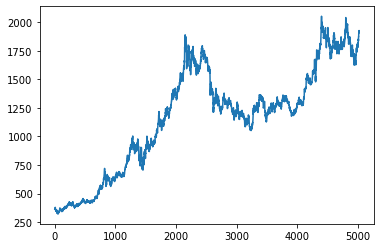

In [70]:
plt.plot(ds)

In [71]:
import numpy as np

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [74]:
len(ds_scaled), len(ds)

(5025, 5025)

In [75]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [76]:
train_size,test_size

(3517, 1508)

In [77]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [78]:
len(ds_train),len(ds_test)

(3517, 1508)

In [79]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [80]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [81]:
X_train.shape,y_train.shape

((3416, 100), (3416,))

In [82]:
X_test.shape, y_test.shape

((1407, 100), (1407,))

In [83]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [84]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [85]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=64,return_sequences=False))
#model.add(LSTM(units=50,return_sequences=True))
#model.add(LSTM(units=100, dropout=0.1))
model.add(Dense(units=25,activation='linear'))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [86]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
54/54 [==============================] - 22s 346ms/step - loss: 0.0103 - accuracy: 0.0000e+00 - val_loss: 6.7918e-04 - val_accuracy: 7.1073e-04
Epoch 2/100
54/54 [==============================] - 17s 324ms/step - loss: 3.1418e-04 - accuracy: 0.0000e+00 - val_loss: 3.4532e-04 - val_accuracy: 7.1073e-04
Epoch 3/100
54/54 [==============================] - 17s 324ms/step - loss: 2.7406e-04 - accuracy: 0.0000e+00 - val_loss: 3.9290e-04 - val_accuracy: 7.1073e-04
Epoch 4/100
54/54 [==============================] - 17s 320ms/step - loss: 2.6849e-04 - accuracy: 0.0000e+00 - val_loss: 3.7734e-04 - val_accuracy: 7.1073e-04
Epoch 5/100
54/54 [==============================] - 17s 322ms/step - loss: 2.6724e-04 - accuracy: 0.0000e+00 - val_loss: 3.3058e-04 - val_accuracy: 7.1073e-04
Epoch 6/100
54/54 [==============================] - 17s 314ms/step - loss: 2.6163e-04 - accuracy: 0.0000e+00 - val_loss: 3.0516e-04 - val_accuracy: 7.1073e-04
Epoch 7/100
54/54 [=========================

# Neuer Abschnitt

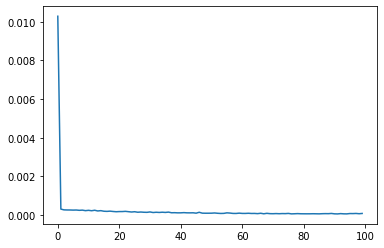

In [87]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [88]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

44/44 [==============================] - 3s 61ms/step


In [89]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

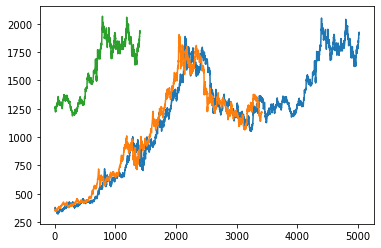

In [90]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [91]:
type(train_predict)

numpy.ndarray

In [92]:
test = np.vstack((train_predict,test_predict))

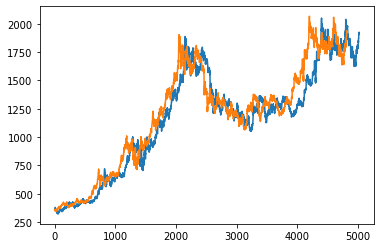

In [93]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [94]:
len(ds_test)

1508

In [101]:
#Getting the last 100 days records
fut_inp = ds_test[1408:]

In [102]:
fut_inp = fut_inp.reshape(1,-1)

In [103]:
tmp_inp = list(fut_inp)

In [104]:
fut_inp.shape

(1, 100)

In [105]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [106]:
#Predicting next 1 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<1):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.9329454898834229]]


In [107]:
len(ds_scaled)

5025

In [111]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,102)
#plot_pred=np.arange(101,139)

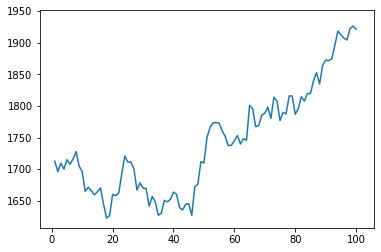

In [113]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[4925:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [114]:
ds_new = ds_scaled.tolist()

In [115]:
len(ds_new)

5025

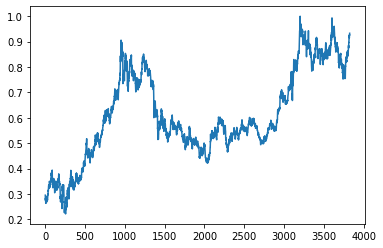

In [116]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [117]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

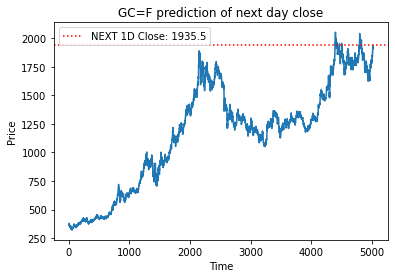

In [118]:
#Plotting final results with predicted value after 1 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next day close".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 1D Close: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

